In [99]:
#import the dataset
import pandas as pd


In [100]:
dataset = pd.read_csv('../datasets/game.csv')

In [101]:
dataset

,actor,is_male,is_indian,is_over_35,worked_in_movies,is_action_actor,is_romance_actor,is_comedy_actor,is_drama_actor
0,Shah Rukh Khan,yes,yes,yes,yes,no,yes,no,no
1,Salman Khan,yes,yes,yes,yes,yes,no,no,no
2,Aamir Khan,yes,yes,yes,yes,no,no,no,yes
3,Akshay Kumar,yes,yes,yes,yes,yes,no,no,no
4,Hrithik Roshan,yes,yes,yes,yes,yes,no,no,no
5,Ranbir Kapoor,yes,yes,no,yes,no,yes,no,no
6,Ranveer Singh,yes,yes,no,yes,no,no,no,yes
7,Ayushmann Khurrana,yes,yes,no,yes,no,no,yes,no
8,Varun Dhawan,yes,yes,no,yes,no,no,yes,no
9,Vicky Kaushal,yes,yes,no,yes,no,no,no,yes


In [102]:
predictors = dataset.drop('actor',axis=1)
labels = dataset['actor']

In [103]:
predictors

,is_male,is_indian,is_over_35,worked_in_movies,is_action_actor,is_romance_actor,is_comedy_actor,is_drama_actor
0,yes,yes,yes,yes,no,yes,no,no
1,yes,yes,yes,yes,yes,no,no,no
2,yes,yes,yes,yes,no,no,no,yes
3,yes,yes,yes,yes,yes,no,no,no
4,yes,yes,yes,yes,yes,no,no,no
5,yes,yes,no,yes,no,yes,no,no
6,yes,yes,no,yes,no,no,no,yes
7,yes,yes,no,yes,no,no,yes,no
8,yes,yes,no,yes,no,no,yes,no
9,yes,yes,no,yes,no,no,no,yes


In [104]:
labels

0           Shah Rukh Khan
1              Salman Khan
2               Aamir Khan
3             Akshay Kumar
4           Hrithik Roshan
5            Ranbir Kapoor
6            Ranveer Singh
7       Ayushmann Khurrana
8             Varun Dhawan
9            Vicky Kaushal
10         Priyanka Chopra
11        Deepika Padukone
12              Alia Bhatt
13            Katrina Kaif
14          Anushka Sharma
15             Vidya Balan
16          Kareena Kapoor
17           Taapsee Pannu
18            Rani Mukerji
19    Jacqueline Fernandez
Name: actor, dtype: object

In [105]:
dataset
X = dataset.drop('actor',axis=1)
Y = dataset['actor']

In [106]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    """
    Automatically encodes all categorical columns in a DataFrame using LabelEncoder.
    
    Returns:
    - df: DataFrame with new encoded columns
    - encoders: dictionary of LabelEncoders used
    """
    encoders = {}
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        encoder = LabelEncoder()
        df[col + '_n'] = encoder.fit_transform(df[col])
        encoders[col] = encoder
        
    return df, encoders

# Usage
X, encoders = encode_categorical_columns(X)

In [107]:
def apply_encoders(df, encoders):
    """
    Applies pre-fitted LabelEncoders to the corresponding columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame to transform
    - encoders: dictionary of {column_name: LabelEncoder}

    Returns:
    - df: transformed DataFrame with encoded columns
    """
    for col, encoder in encoders.items():
        if col in df.columns:
            df[col] = encoder.transform(df[col])
        else:
            print(f"Warning: column '{col}' not found in the dataset.")
    
    return df

In [108]:
X = apply_encoders(X, encoders)

In [109]:
X

,is_male,is_indian,is_over_35,worked_in_movies,is_action_actor,is_romance_actor,is_comedy_actor,is_drama_actor,is_male_n,is_indian_n,is_over_35_n,worked_in_movies_n,is_action_actor_n,is_romance_actor_n,is_comedy_actor_n,is_drama_actor_n
0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
2,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
7,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [110]:
X=X.drop(['is_male','is_indian','is_over_35','worked_in_movies','is_action_actor','is_romance_actor','is_comedy_actor','is_drama_actor'],axis=1)

In [111]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(X,Y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


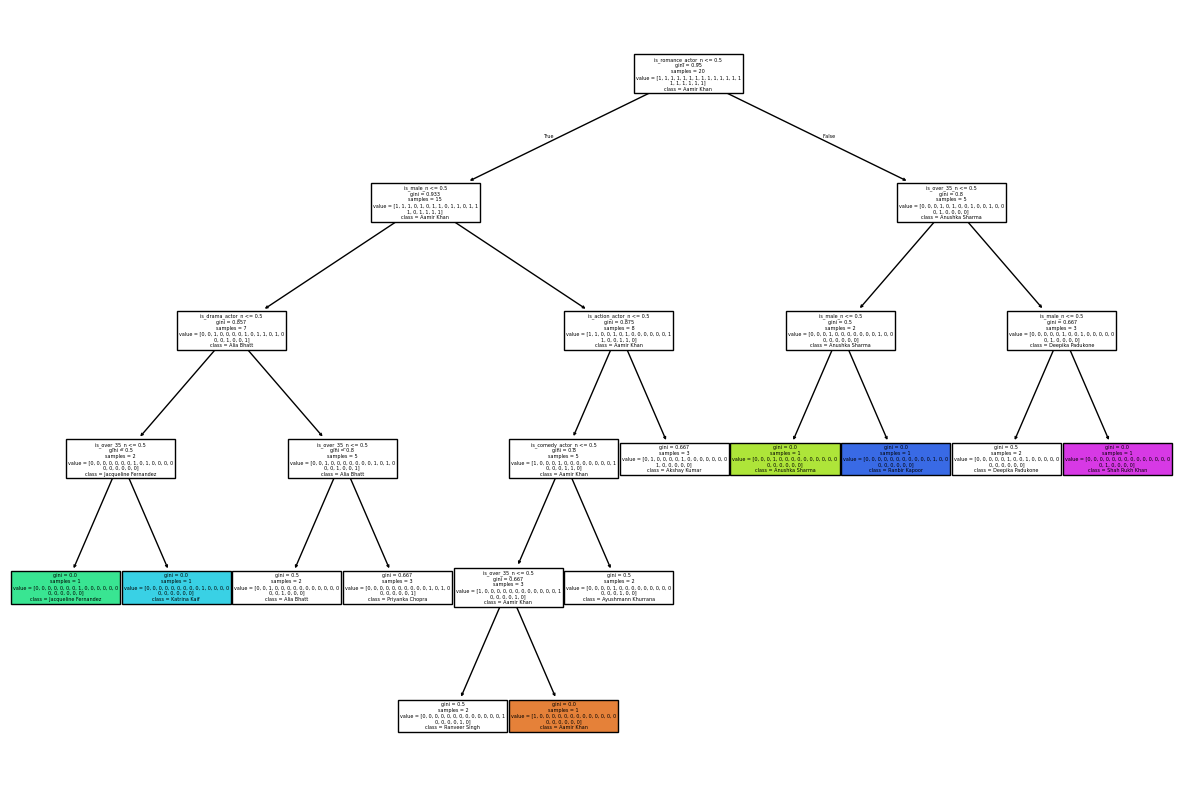

In [112]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

In [113]:
X

,is_male_n,is_indian_n,is_over_35_n,worked_in_movies_n,is_action_actor_n,is_romance_actor_n,is_comedy_actor_n,is_drama_actor_n
0,1,0,1,0,0,1,0,0
1,1,0,1,0,1,0,0,0
2,1,0,1,0,0,0,0,1
3,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,0
5,1,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,1
7,1,0,0,0,0,0,1,0
8,1,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,1


In [114]:
FEATURE_QUESTION = {
    "is_male_n": "Is the actor male or Female",
    "is_indian_n": "Is the actor Indian ?",
    "is_over_35_n": "Is the actor over 35 years old",
    "worked_in_movies_n": "Does the actor work in movies ?",
    "is_action_actor_n": "Is he action actor ?",
    "is_romance_actor_n": "Is he romance actor ?",
    "is_comedy_actor_n": "Is he comedy actor ?",
    "is_drama_actor_n": "Is he drama actor ?",
    
}

THRESHOLD_MEANING = {
    "is_male_n": {0.5: ("Female", "Male")},            # 0 → Female, 1 → Male
    "is_indian_n": {0.5: ("African", "Indian")},       # 0 → African, 1 → Indian
    "worked_in_movies_n": {0.5: ("No", "Yes")},        # 0 → No, 1 → Yes
    "is_action_actor_n": {0.5: ("No", "Yes")},
    "is_romance_actor_n": {0.5: ("No", "Yes")},
    "is_comedy_actor_n": {0.5: ("No", "Yes")},
    "is_drama_actor_n": {0.5: ("No", "Yes")},
    "is_over_35_n": {0.5: ("No", "Yes")}               # Assuming you encoded age > 35 as 1
}

In [115]:
import json
from sklearn.tree import _tree

def export_tree_to_json(clf, feature_names, feature_question_map, threshold_meaning_map, out_path="tree.json"):
    """
    clf: trained DecisionTreeClassifier
    feature_names: list like ["movies_n", "gender_n", "nationality_n"]
    feature_question_map: dict mapping feature -> question string
    threshold_meaning_map: dict mapping feature -> { threshold_float: (left_label, right_label) }
    out_path: filename to write json
    """

    tree = clf.tree_
    nodes = {}

    def recurse(node_id):
        node = {}
        # leaf
        if tree.feature[node_id] == _tree.TREE_UNDEFINED:
            values = tree.value[node_id][0]              # class counts
            predicted_index = int(values.argmax())      # index of predicted class
            predicted_class = clf.classes_[predicted_index]
            node["type"] = "leaf"
            node["predicted_class"] = str(predicted_class)
            node["samples"] = int(tree.n_node_samples[node_id])
            return node

        # not leaf
        feat_idx = int(tree.feature[node_id])
        feat_name = feature_names[feat_idx]
        threshold = float(tree.threshold[node_id])

        node["type"] = "internal"
        node["feature"] = feat_name
        node["threshold"] = threshold
        node["left"] = int(tree.children_left[node_id])
        node["right"] = int(tree.children_right[node_id])
        node["samples"] = int(tree.n_node_samples[node_id])

        # human readable question and option labels (if provided)
        node["question"] = feature_question_map.get(feat_name, feat_name)
        # If exact threshold mapping exists, use human labels
        thr_map = threshold_meaning_map.get(feat_name, {})
        # NOTE: JSON keys are strings, but thresholds are floats; we compare numerically
        # find the mapping where key equals threshold
        left_label, right_label = None, None
        for t_k, (l_lbl, r_lbl) in thr_map.items():
            if float(t_k) == threshold:
                left_label, right_label = l_lbl, r_lbl
                break

        # Fallback generic labels if mapping not found:
        if left_label is None:
            left_label = f"≤ {threshold}"
        if right_label is None:
            right_label = f"> {threshold}"

        node["left_label"] = left_label
        node["right_label"] = right_label

        return node

    # walk all nodes and export
    for nid in range(tree.node_count):
        nodes[nid] = recurse(nid)

    export = {
        "nodes": nodes,
        "root": 0,
        "feature_names": feature_names,
        "class_names": [str(c) for c in clf.classes_]
    }

    with open(out_path, "w") as f:
        json.dump(export, f, indent=2)

    print("Exported tree to", out_path)

In [116]:
export_tree_to_json(model, ['is_male_n', 'is_indian_n', 'is_over_35_n', 'worked_in_movies_n', 
 'is_action_actor_n', 'is_romance_actor_n', 'is_comedy_actor_n', 'is_drama_actor_n'], FEATURE_QUESTION, THRESHOLD_MEANING, out_path="actor_tree.json")

Exported tree to actor_tree.json
